In [1]:
from google.colab import files
files.upload()

Saving vgames2.csv to vgames2 (1).csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy import stats
df = pd.read_csv('vgames2.csv')
#Unnamed column 삭제
df = df.drop(['Unnamed: 0'], axis = 1) 
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
#결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
# 결측치가 랜덤 성인지, 특정 항목에 몰려 있는지 확인
df[df['Year'].isnull()]
df[df['Genre'].isnull()]
df[df['Publisher'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0,0.01
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
2970,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0,0,0.06,0
3184,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0,0.01
3412,Dance with Devils,PSV,2016.0,Action,NaN,0,0,0.01,0


In [5]:
#결측치 행 제거
df1 = df.dropna(axis=0)
df1.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [6]:
# index 재설정
df1 = df1.reset_index(drop=True)

In [42]:
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16137,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16138,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16139,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [8]:
# 1의 자리수 = 100만
# K = *0.001 (판매량 구글링 했을 때 이 10의^-3으로 추정) , M = 1 / 단위 통일위해 삭제
#contains
bool_NA = df1['NA_Sales'].str.contains('K')
bool_EU = df1['EU_Sales'].str.contains('K')
bool_JP = df1['JP_Sales'].str.contains('K')
bool_ot = df1['Other_Sales'].str.contains('K')

In [ ]:
#for문 NA
count = 0
for i in range(len(bool_NA)):
  if  bool_NA[i] == True:
    print(count)
    df1['NA_Sales'][i] = float(df1['NA_Sales'][i][:-1])*0.001
  count+=1

In [ ]:
#for문 EU
count = 0
for i in range(len(bool_EU)):
  if  bool_EU[i] == True:
    print(count)
    df1['EU_Sales'][i] = float(df1['EU_Sales'][i][:-1])*0.001
  count+=1

In [ ]:
#for문 JP
count = 0
for i in range(len(bool_JP)):
  if  bool_JP[i] == True:
    print(count)
    df1['JP_Sales'][i] = float(df1['JP_Sales'][i][:-1])*0.001
  count+=1

In [ ]:
#for문 other
count = 0
for i in range(len(bool_ot)):
  if  bool_ot[i] == True:
    print(count)
    df1['Other_Sales'][i] = float(df1['Other_Sales'][i][:-1])*0.001
  count+=1

In [13]:
#contains 'M'
bool_NA = df1['NA_Sales'].str.contains('M')
bool_EU = df1['EU_Sales'].str.contains('M')
bool_JP = df1['JP_Sales'].str.contains('M')
bool_ot = df1['Other_Sales'].str.contains('M')

In [ ]:
#for문 NA
count = 0
for i in range(len(bool_NA)):
  if  bool_NA[i] == True:
    print(count)
    df1['NA_Sales'][i] = float(df1['NA_Sales'][i][:-1])*1
  count+=1

In [ ]:
#for문 EU
count = 0
for i in range(len(bool_EU)):
  if  bool_EU[i] == True:
    print(count)
    df1['EU_Sales'][i] = float(df1['EU_Sales'][i][:-1])*1
  count+=1

In [ ]:
#for문 JP
count = 0
for i in range(len(bool_JP)):
  if  bool_JP[i] == True:
    print(count)
    df1['JP_Sales'][i] = float(df1['JP_Sales'][i][:-1])*1
  count+=1

In [ ]:
#for문 other
count = 0
for i in range(len(bool_ot)):
  if  bool_ot[i] == True:
    print(count)
    df1['Other_Sales'][i] = float(df1['Other_Sales'][i][:-1])*1
  count+=1

In [18]:
df1.round(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [19]:
# Year < 1979 drop (두자리 숫자에 1900, 2000을 더하면 될 것 같지만 불확실 데이터로 판단 하여 삭제)
df1 = df1[df1.Year > 1979]
df1 = df1.reset_index(drop=True)
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16137,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16138,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16139,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [20]:
df1[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']] = df1[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']].apply(pd.to_numeric)

In [21]:
# global_sales column 추가
df1['total_sales'] = df1['NA_Sales'] + df1['EU_Sales'] + df1['JP_Sales'] + df1['Other_Sales']
df1.round(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16136,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16137,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16138,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16139,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [22]:
#연도별 게임 트렌드(데이터에 '0'값이 많아서 출시가 많은 'Genre' 값으로 트렌드를 해석)  
year_max_df = df1.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

In [23]:
genre = year_max_genre['Genre'].values

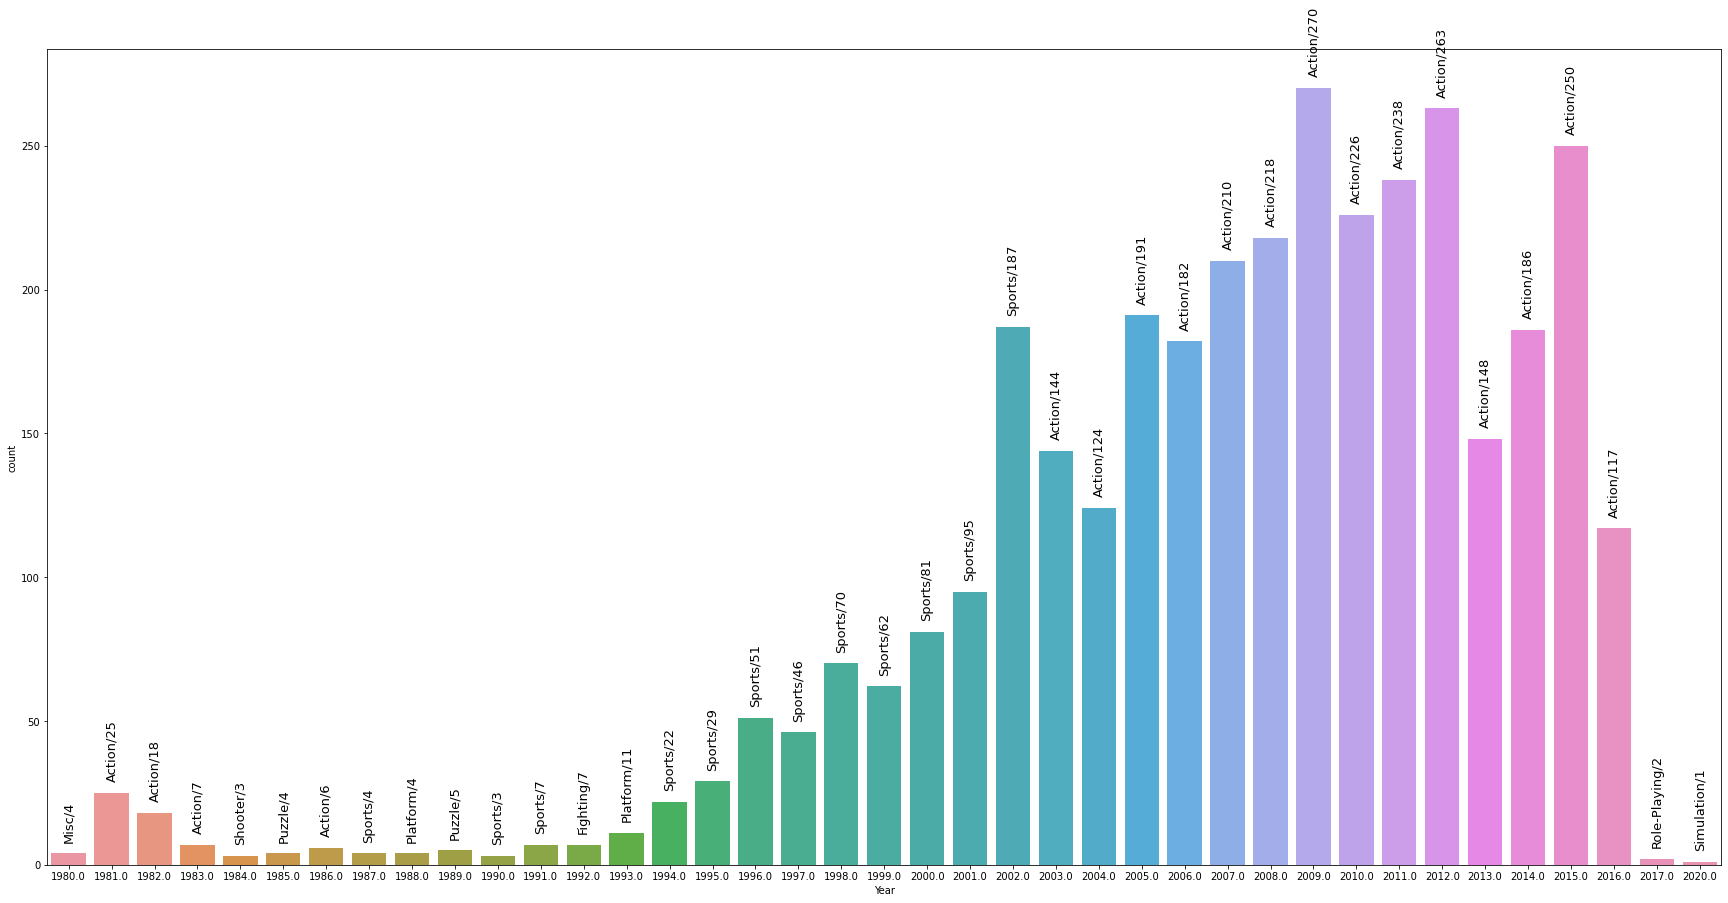

In [24]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '/' +str(value)), color='#000', size=13, rotation= 90, ha="center")
    index += 1

In [25]:
#2003년 부터 유의미한 수준의 데이터로는 'Action'장르의 게임이 대부분 점유함

In [27]:
comp_genre = df1[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

comp_map = comp_genre.groupby(by=['Genre']).sum()

In [28]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_sum')
comp_table.head()

,Genre,Sale_Area,Sale_sum
0,Action,NA_Sales,855.96
1,Adventure,NA_Sales,101.33
2,Fighting,NA_Sales,220.11
3,Misc,NA_Sales,394.29
4,Platform,NA_Sales,442.46


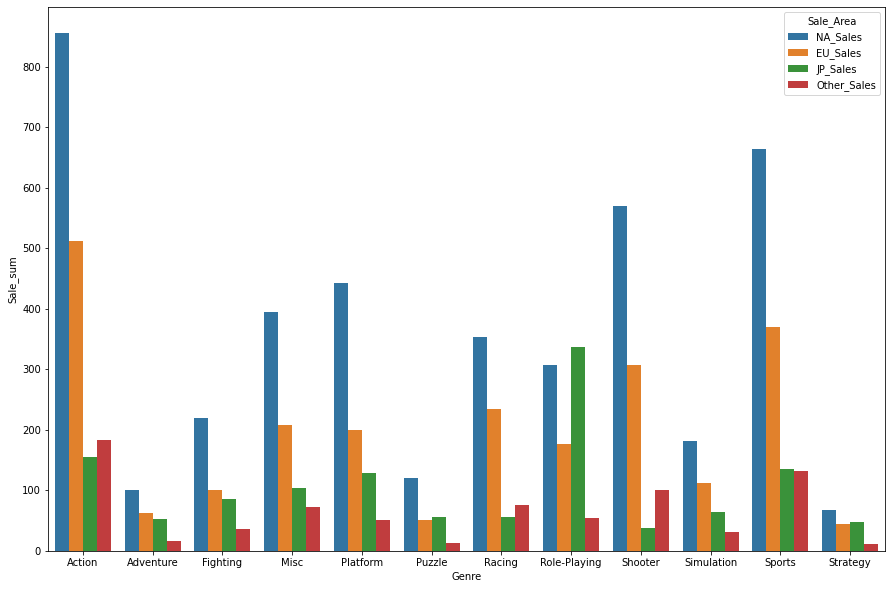

In [29]:
#연도별 게임의 트렌드(판매량 기준)
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_sum', hue='Sale_Area', data=comp_table);

In [30]:
def diag_plot (data, column, region):
    region_data = df1.groupby([column])[region].sum().sort_values(ascending=False).head()
    data = region_data
    
    data.plot(y=column, kind='bar', figsize=(10,5),
              color=['red', 'steelblue', 'violet', 'lightgreen', 'lightblue'],
              edgecolor='black'
             )

    
    plt.title('Distribution of preferred by region')
    plt.ylabel('')
    plt.xlabel('')
    plt.show()

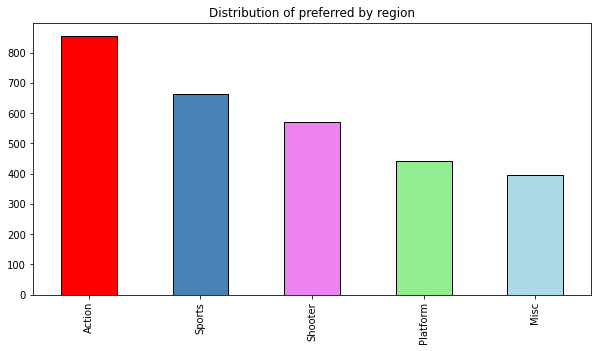

In [31]:
# NA 선호장르
diag_plot(df1, 'Genre', 'NA_Sales')

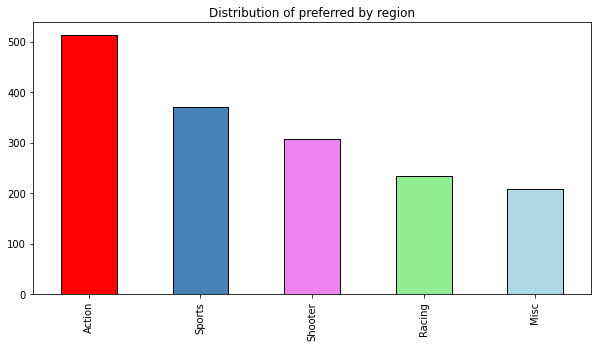

In [32]:
# EU 선호장르
diag_plot(df1, 'Genre', 'EU_Sales')

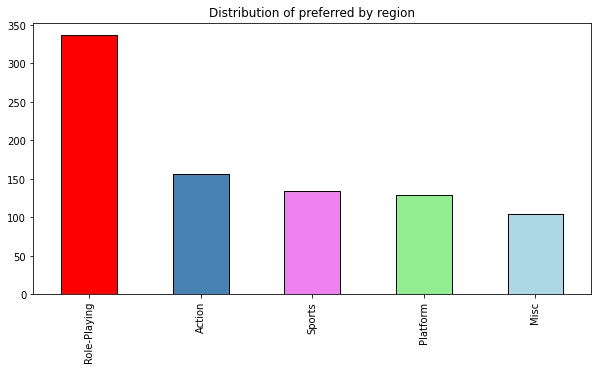

In [33]:
# JP 선호장르 (일본만 유일하게 action이 아닌 RPG 장르가 점유함)
diag_plot(df1, 'Genre', 'JP_Sales')

In [34]:
# 지역에 따라 선호하는 게임 장르
comp_genre = df1[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

comp_map = comp_genre.groupby(by=['Genre']).sum()


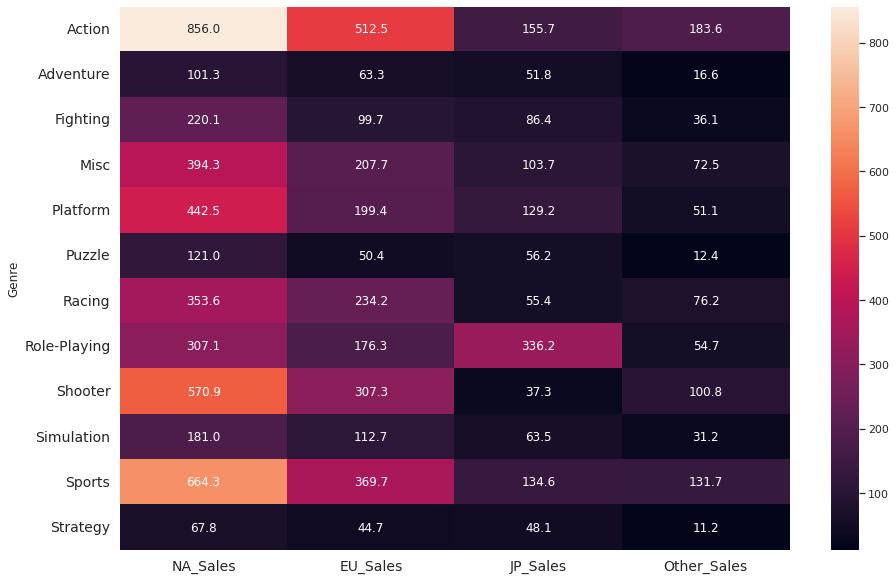

In [35]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [36]:
# 출고량 높은 게임의 순위 1~20위
sortdf = df1.sort_values(by=['total_sales'], ascending=False)
top_game_sale = sortdf.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'total_sales']]
top_game_sale = top_game_sale.sort_values(by=['total_sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale

,Name,Year,Genre,total_sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.83
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.38
5,Tetris,1989.0,Puzzle,30.26
6,New Super Mario Bros.,2006.0,Platform,30.01
7,Wii Play,2006.0,Misc,29.01
8,New Super Mario Bros. Wii,2009.0,Platform,28.61
9,Duck Hunt,1984.0,Shooter,28.31


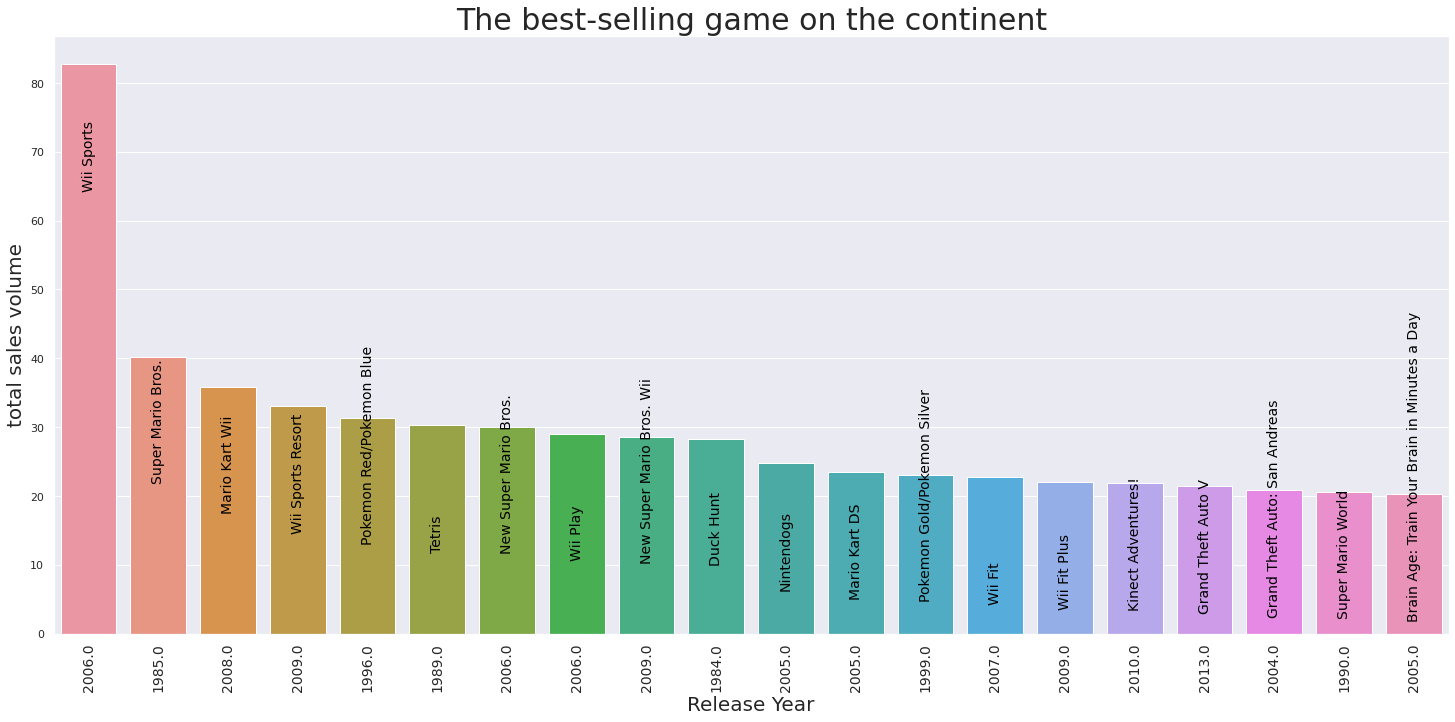

In [37]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

plt.figure(figsize=(25, 11))
g = sns.barplot(x='Name', y='total_sales', data=top_game_sale)
index = 0
for value in top_game_sale['total_sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.title("The best-selling game on the continent", fontsize=30)
plt.xlabel("Release Year", fontsize=20)
plt.ylabel("total sales volume", fontsize=20)
plt.show()

In [38]:
#앞의 데이터 분석을 통해 'action'장르가 가장 인기 있어 보였지만
#판매량에서는 'action'장르가 20위 순위안에 2개 밖에 있지 않았다.
#판매량 상위 8개의 게임 장르에서 'MOtion sensor'로 진행 되는 게임과 'Action' 장르를 비교해 보고 싶었다.
Motion_games = ['Wii Sports'],['Mario Kart Wii'], ['Wii Sports Resort'], ['Wii Play'], ['New Super Mario Bros. Wii'], ['Wii Fit'], ['Wii Fit Plus'], ['Kinect Adventures!']
Action_games = ['Grand Theft Auto V'],['Grand Theft Auto: San Andreas'], ['Wii Sports Resort'], ['Wii Play'], ['New Super Mario Bros. Wii'], ['Wii Fit'], ['Wii Fit Plus'], ['Kinect Adventures!']

In [39]:
motion_list = [134.71, 90.73, 24.84, 25.45, 275.73]
action_list = [68.51, 51.41, 7.67, 28.56, 156.15]
mot_act = pd.DataFrame({'Motion games': motion_list, 'Action games': action_list}, index=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'])
mot_act

,Motion games,Action games
NA_Sales,134.71,68.51
EU_Sales,90.73,51.41
JP_Sales,24.84,7.67
Other_Sales,25.45,28.56
Total_Sales,275.73,156.15


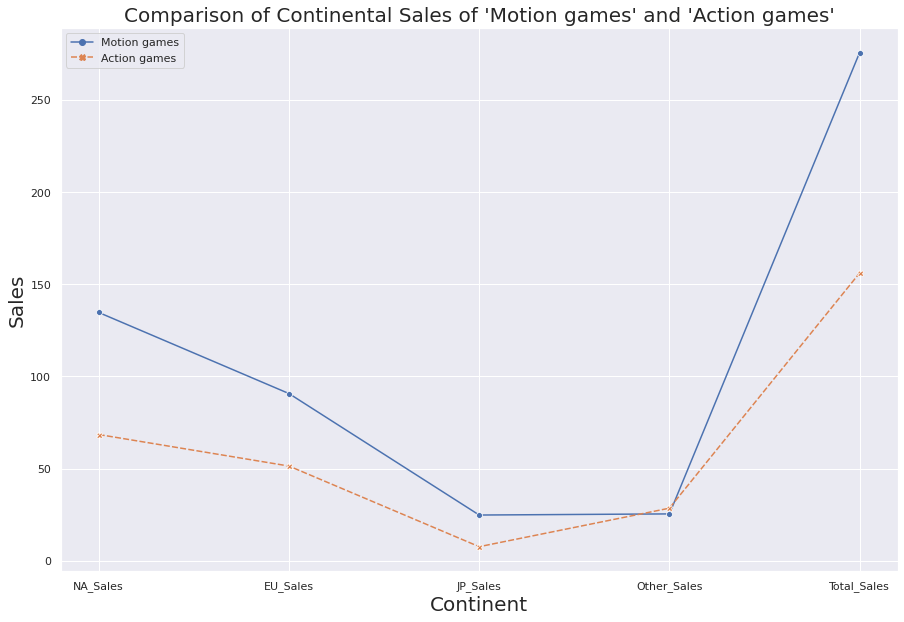

In [41]:
plt.figure(figsize=(15, 10))
plt.title("Comparison of Continental Sales of 'Motion games' and 'Action games'", fontsize=20)
plt.xlabel("Continent", fontsize=20)
plt.ylabel("Sales", fontsize=20)

sns.lineplot(data=mot_act, markers=True);